# Task #2 : Prediction using Unsupervised ML
## Predict the optimum number of clusters in Iris dataset and represent it visually.
## Author : Sujitha Rasamsetty

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1 : Load the dataset

In [2]:
data_frame = pd.read_csv('Iris.csv')

In [3]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data_frame.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Removal of Id column as it is not required for data analysis i.e clustering
data_frame = data_frame.iloc[ : , 1:]

In [6]:
data_frame.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Step 2 : Separation of independent and dependent matrix

In [7]:
# Independent matrix
X = data_frame.iloc[:,:-1].values
# Dependent matrix
y = data_frame.iloc[:,-1].values

In [8]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [9]:
y[0]

'Iris-setosa'

### Step 3 : Handling of categorical data

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
y_labelencoder = LabelEncoder()

In [12]:
y = y_labelencoder.fit_transform(y)

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Step 4 : Applying suitable ML algorithm

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters=3, n_init=150)

In [16]:
kmeans.fit(X)

KMeans(n_clusters=3, n_init=150)

In [17]:
y_kmeans = kmeans.predict(X)

In [18]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

# Step 5 : Visualization of Iris flower dataset with optimum 3 clusters

,Color,Iris species
0,purple,setosa
1,blue,versicolor
2,yellow,virginica


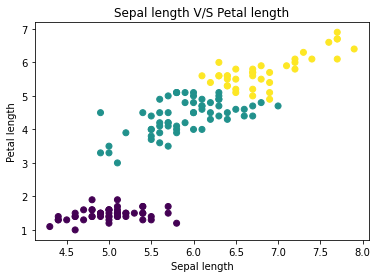

In [26]:
plt.scatter(X[:, 0], X[:, 2], c=y_kmeans)
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.title('Sepal length V/S Petal length')

pd.DataFrame({'Color':['purple', 'blue', 'yellow'], 'Iris species':['setosa', 'versicolor', 'virginica']})

,Color,Iris species
0,purple,setosa
1,blue,versicolor
2,yellow,virginica


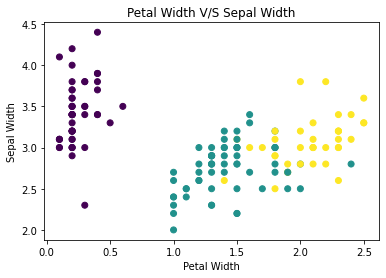

In [27]:
plt.scatter(X[:, 3], X[:, 1], c=y_kmeans)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.title('Petal Width V/S Sepal Width')

pd.DataFrame({'Color':['purple', 'blue', 'yellow'], 'Iris species':['setosa', 'versicolor', 'virginica']})

## Difference in predicted and actual clustering values


Text(0.5, 1.0, 'Actual')

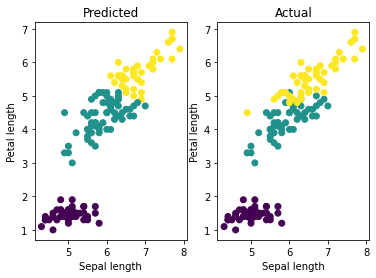

In [21]:
fig, axes = plt.subplots(1,2)

axes[0].scatter(X[:, 0], X[:, 2], c=y_kmeans)
axes[0].set_xlabel('Sepal length')
axes[0].set_ylabel('Petal length')
axes[0].set_title('Predicted')

axes[1].scatter(X[:, 0], X[:, 2], c=y)
axes[1].set_xlabel('Sepal length')
axes[1].set_ylabel('Petal length')
axes[1].set_title('Actual')

In [22]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [23]:
pd.DataFrame({'Predicted':y_kmeans,'Actual':y})

,Predicted,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,2,2
146,1,2
147,2,2
148,2,2


# Direct cluster analysis using Seaborn

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

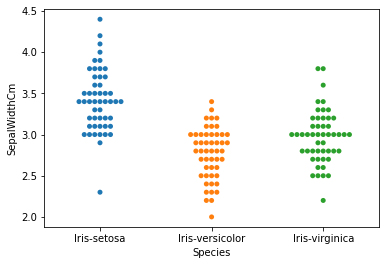

In [24]:
sns.swarmplot(x='Species', y='SepalWidthCm', data=data_frame)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

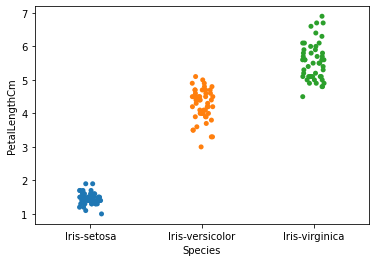

In [25]:
sns.stripplot(x='Species', y='PetalLengthCm', data=data_frame)